In [1]:
import pandas as pd




In [2]:
# Load the dataset
file_path = 'glass_data_cleaned.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataframe
df.head()

column_a  column_b  column_c  column_d  column_e  column_f  column_g  \
0       1.0   1.52101     13.64      4.49      1.10     71.78      0.06   
1       2.0   1.51761     13.89      3.60      1.36     72.73      0.48   
2       3.0   1.51618     13.53      3.55      1.54     72.99      0.39   
3       4.0   1.51766     13.21      3.69      1.29     72.61      0.57   
4       5.0   1.51742     13.27      3.62      1.24     73.08      0.55   

   column_h  column_i  column_j  column_k  
0      8.75       0.0       0.0         1  
1      7.83       0.0       0.0         1  
2      7.78       0.0       0.0         1  
3      8.22       0.0       0.0         1  
4      8.07       0.0       0.0         1

In [ ]:
# Performing RFE for feature selection 

In [3]:
from sklearn.model_selection import train_test_split

# Separate the target variable and predictor variables
X = df.drop('column_k', axis=1)
y = df['column_k']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((171, 10), (43, 10), (171,), (43,))

In [4]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rforestclf = RandomForestClassifier(random_state=42)

# Initialize RFE with the classifier and desired number of features
RFE = RFE(estimator=rforestclf, step=1)

# Fit RFE
RFE = RFE.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = RFE.ranking_

# Get the features that are considered best
best_features = X.columns[RFE.support_]

# Show the best features and their rankings
best_features, feature_ranking


(Index(['column_a', 'column_c', 'column_d', 'column_e', 'column_h'], dtype='object'),
 array([1, 2, 1, 1, 1, 5, 3, 1, 4, 6]))

In [ ]:
    # column_a
    # column_c
    # column_d
    # column_e
    # column_h

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Select the best features for X_train and X_test
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Initialize performance metrics dictionary
metrics_dict = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted'),
    'ROC AUC': make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
}

# Initialize results dictionary to store performance metrics
results = {}

# Perform k-fold cross-validation and compute performance metrics
for name, clf in classifiers.items():
    results[name] = {}
    for metric_name, metric in metrics_dict.items():
        cv_scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring=metric)
        results[name][metric_name] = np.mean(cv_scores)

results


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initialize results dictionary to store performance metrics after scaling
results_scaled = {}

# Perform k-fold cross-validation and compute performance metrics
for name, clf in classifiers.items():
    results_scaled[name] = {}
    for metric_name, metric in metrics_dict.items():
        cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring=metric)
        results_scaled[name][metric_name] = np.mean(cv_scores)

results_scaled


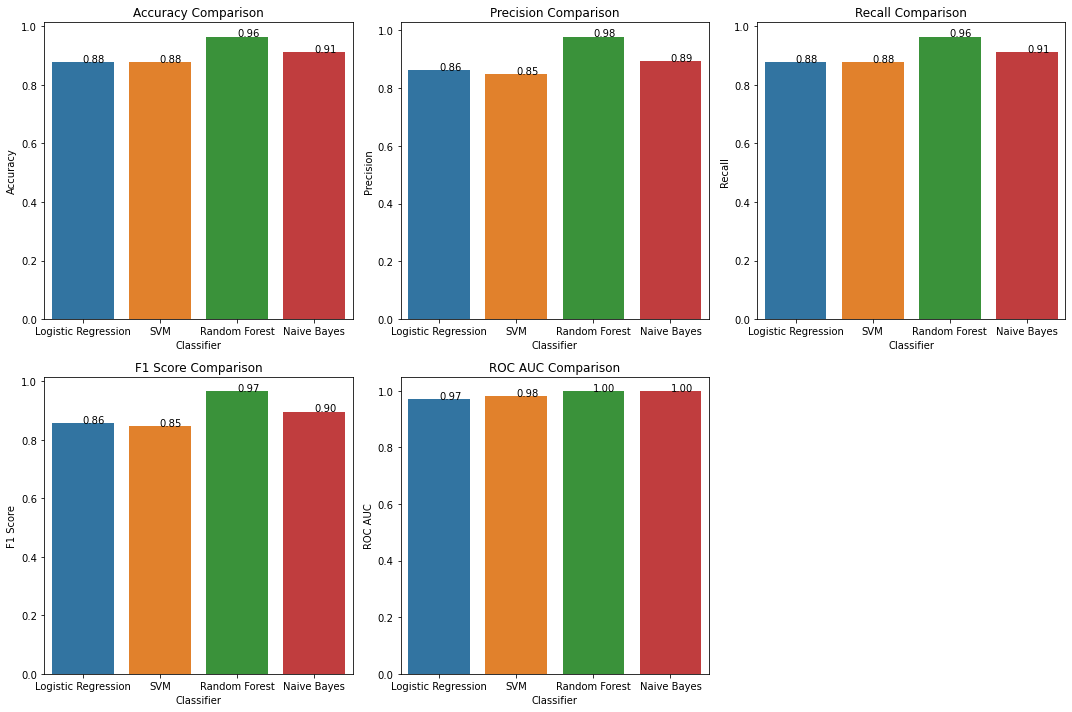

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.877143   0.862630  0.877143  0.856384  0.971533
1                  SVM  0.877143   0.849401  0.877143  0.847532  0.982374
2        Random Forest  0.964874   0.978517  0.964874  0.967023  0.998515
3          Naive Bayes  0.912101   0.893484  0.912101  0.896726  0.997348

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the results to a DataFrame for easier manipulation
results_df = pd.DataFrame(results_scaled).T

# Plot the performance metrics
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_dict.keys(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=results_df.index, y=metric, data=results_df)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()

# Show the performance metrics in a table
results_df.reset_index().rename(columns={'index': 'Classifier'})


In [ ]:
# For all features 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

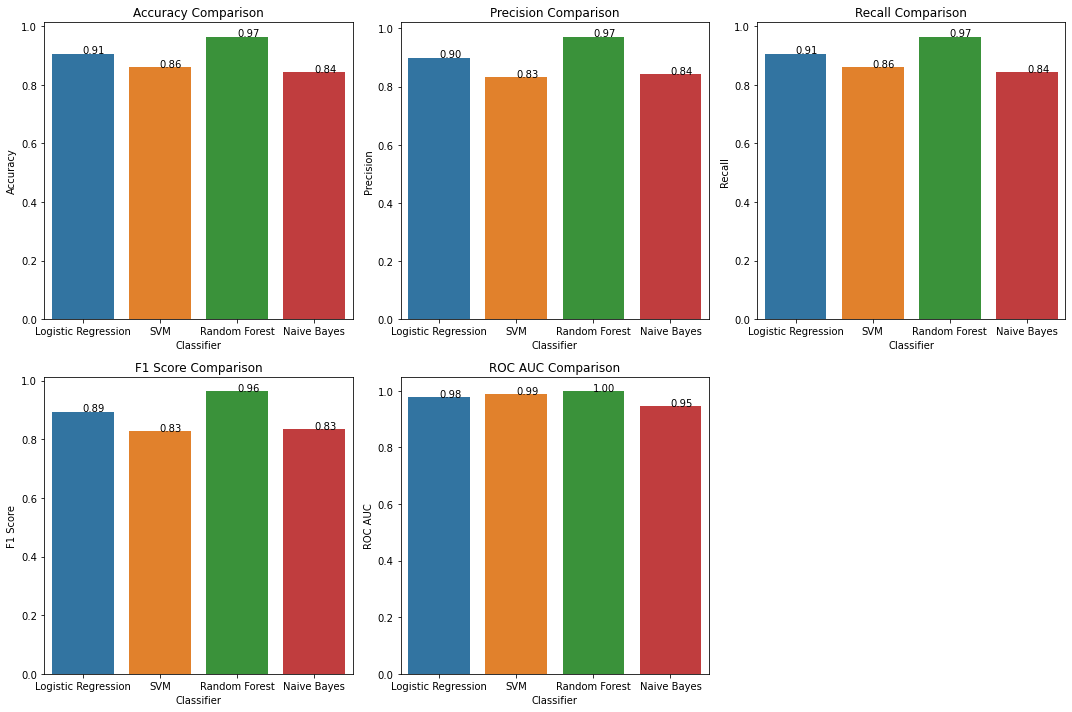

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.906723   0.899686  0.906723  0.894273  0.976368
1                  SVM  0.859664   0.831447  0.859664  0.827458  0.988484
2        Random Forest  0.965042   0.972247  0.965042  0.964095  0.998859
3          Naive Bayes  0.842521   0.843575  0.842521  0.833963  0.946337

In [17]:
# Scale all features for X_train and X_test
X_train_scaled_all = scaler.fit_transform(X_train)
X_test_scaled_all = scaler.transform(X_test)

# Initialize results dictionary to store performance metrics for all features
results_all_features = {}

# Perform k-fold cross-validation and compute performance metrics
for name, clf in classifiers.items():
    results_all_features[name] = {}
    for metric_name, metric in metrics_dict.items():
        cv_scores = cross_val_score(clf, X_train_scaled_all, y_train, cv=5, scoring=metric)
        results_all_features[name][metric_name] = np.mean(cv_scores)

# Convert the results to a DataFrame for easier manipulation
results_all_features_df = pd.DataFrame(results_all_features).T

# Plot the performance metrics for all features
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_dict.keys(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=results_all_features_df.index, y=metric, data=results_all_features_df)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    for index, value in enumerate(results_all_features_df[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()

# Show the performance metrics in a table
results_all_features_df.reset_index().rename(columns={'index': 'Classifier'})


In [ ]:
# Forward selection

In [19]:
# Scale the features for X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform forward feature selection with scaled features
best_features_forward_scaled, best_accuracy_forward_scaled = forward_selection(pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train, log_reg_clf)

best_features_forward_scaled, best_accuracy_forward_scaled


(['column_a', 'column_h', 'column_d', 'column_g', 'column_b', 'column_j'],
 0.9707602339181286)

In [ ]:
    # column_a
    # column_h
    # column_d
    # column_g
    # column_b
    # column_j

In [21]:
# Re-fit the scaler on the selected features
scaler_forward = StandardScaler()
X_train_scaled_forward = scaler_forward.fit_transform(X_train_selected_forward)
X_test_scaled_forward = scaler_forward.transform(X_test_selected_forward)

# Initialize results dictionary to store performance metrics for forward-selected features
results_forward_selected = {}

# Perform k-fold cross-validation and compute performance metrics
for name, clf in classifiers.items():
    results_forward_selected[name] = {}
    for metric_name, metric in metrics_dict.items():
        cv_scores = cross_val_score(clf, X_train_scaled_forward, y_train, cv=5, scoring=metric)
        results_forward_selected[name][metric_name] = np.mean(cv_scores)

# Convert the results to a DataFrame for easier manipulation
results_forward_selected_df = pd.DataFrame(results_forward_selected).T

# Plot the performance metrics for forward-selected features
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_dict.keys(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=results_forward_selected_df.index, y=metric, data=results_forward_selected_df)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    for index, value in enumerate(results_forward_selected_df[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()

# Show the performance metrics in a table
results_forward_selected_df.reset_index().rename(columns={'index': 'Classifier'})


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.895294   0.888739  0.895294  0.883899  0.976590
1                  SVM  0.871597   0.861040  0.871597  0.852539  0.989993
2        Random Forest  0.970924   0.976893  0.970924  0.970018  0.998712
3          Naive Bayes  0.877647   0.900687  0.877647  0.875057  0.965831

In [22]:
def backward(X, y, clf):
    """Perform backward feature selection using the given classifier."""
    remaining_features = list(X.columns)
    best_accuracy = 0
    best_features = remaining_features.copy()

    while remaining_features:
        temp_accuracy = 0
        temp_feature = None

        for feature in remaining_features:
            trial_features = [f for f in remaining_features if f != feature]
            X_trial = X[trial_features]
            clf.fit(X_trial, y)
            y_pred = clf.predict(X_trial)
            accuracy = accuracy_score(y, y_pred)

            if accuracy >= temp_accuracy:
                temp_accuracy = accuracy
                temp_feature = feature

        if temp_accuracy >= best_accuracy:
            best_accuracy = temp_accuracy
            remaining_features.remove(temp_feature)
            best_features = remaining_features.copy()
        else:
            break

    return best_features, best_accuracy

# Initialize SVM classifier
svm_clf = SVC()

# Perform backward feature selection
best_features_backward, best_accuracy_backward = backward(pd.DataFrame(X_train_scaled_all, columns=X_train.columns), y_train, svm_clf)

best_features_backward, best_accuracy_backward


(['column_a',
  'column_b',
  'column_d',
  'column_g',
  'column_h',
  'column_i',
  'column_j'],
 0.9532163742690059)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

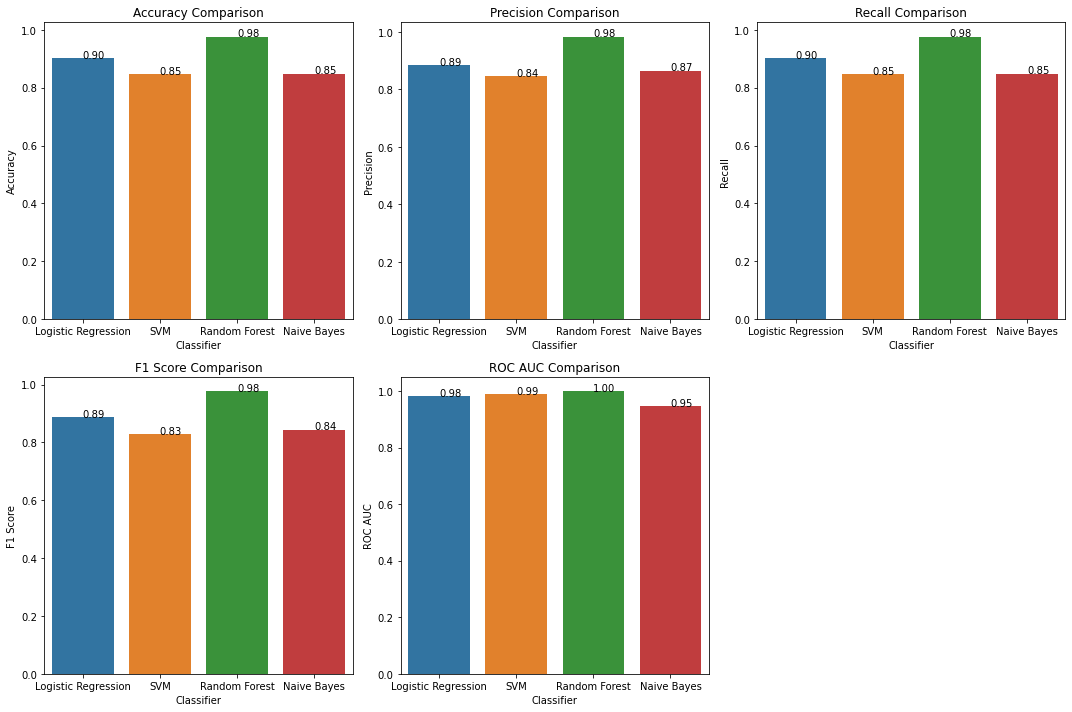

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.901008   0.885404  0.901008  0.887620  0.980561
1                  SVM  0.847899   0.844963  0.847899  0.828052  0.989511
2        Random Forest  0.976807   0.983503  0.976807  0.977247  0.999356
3          Naive Bayes  0.848403   0.865284  0.848403  0.844522  0.945340

In [25]:
# Re-fit the scaler on the selected features based on backward selection
scaler_backward = StandardScaler()
X_train_scaled_backward = scaler_backward.fit_transform(X_train_selected_backward)
X_test_scaled_backward = scaler_backward.transform(X_test_selected_backward)

# Initialize results dictionary to store performance metrics for backward-selected features
results_backward_selected = {}

# Perform k-fold cross-validation and compute performance metrics
for name, clf in classifiers.items():
    results_backward_selected[name] = {}
    for metric_name, metric in metrics_dict.items():
        cv_scores = cross_val_score(clf, X_train_scaled_backward, y_train, cv=5, scoring=metric)
        results_backward_selected[name][metric_name] = np.mean(cv_scores)

# Convert the results to a DataFrame for easier manipulation
results_backward_selected_df = pd.DataFrame(results_backward_selected).T

# Plot the performance metrics for backward-selected features
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_dict.keys(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=results_backward_selected_df.index, y=metric, data=results_backward_selected_df)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    for index, value in enumerate(results_backward_selected_df[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()

# Show the performance metrics in a table
results_backward_selected_df.reset_index().rename(columns={'index': 'Classifier'})


In [ ]:
# Select the best features for X_train and X_test based on backward selection
X_train_selected_backward = X_train[best_features_backward]
X_test_selected_backward = X_test[best_features_backward]

# Scale the selected features
X_train_scaled_backward = scaler.transform(X_train_selected_backward)
X_test_scaled_backward = scaler.transform(X_test_selected_backward)

# Initialize results dictionary to store performance metrics for backward-selected features
results_backward_selected = {}

# Perform k-fold cross-validation and compute performance metrics
for name, clf in classifiers.items():
    results_backward_selected[name] = {}
    for metric_name, metric in metrics_dict.items():
        cv_scores = cross_val_score(clf, X_train_scaled_backward, y_train, cv=5, scoring=metric)
        results_backward_selected[name][metric_name] = np.mean(cv_scores)

# Convert the results to a DataFrame for easier manipulation
results_backward_selected_df = pd.DataFrame(results_backward_selected).T

# Plot the performance metrics for backward-selected features
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_dict.keys(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=results_backward_selected_df.index, y=metric, data=results_backward_selected_df)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    for index, value in enumerate(results_backward_selected_df[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()

# Show the performance metrics in a table
results_backward_selected_df.reset_index().rename(columns={'index': 'Classifier'})
